In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# plt  = pd.read_csv("pipact_data.csv")

# plt.plot(kind='scatter',x='dist',y='RSSI') # scatter plot
# # df.plot(kind='hist')  # histogram

In [1]:
# -- imports -- #
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import math
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# Visualize the confusion matrix
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  


In [3]:
names = ['dist', 'RSSI']


data = pd.read_csv("pipact_databinary.csv", names=names)
data.head()




dist  RSSI
0     1   -66
1     1   -67
2     1   -66
3     1   -67
4     1   -67

In [4]:
X_cols = ['RSSI']

# column that we want to predict
y_col = 'dist'

# 80-20 train-test split of datset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# further split X and y of training nto training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)


# SVM

RBF (Gaussian) Kernel

In [ ]:
# creating a model with sklearn's SVC
svm1 = SVC(gamma=.1, C=1, probability=True)

# training/fitting a model with training data
svm1.fit(X_train, y_train)

In [ ]:
#printing accuracy of testing & training data
y_train_pred=svm1.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm1.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
y_test_pred=svm1.predict(X_test)
print("Testing Accuracy is ", accuracy_score(y_test,y_test_pred)*100)

Linear Kernel

In [ ]:
# creating a model with sklearn's SVC
svm2 = SVC(gamma=.1, C=1, kernel='linear', probability=True)

# training/fitting a model with training data
svm2.fit(X_train, y_train)

y_train_pred=svm2.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm2.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
y_test_pred=svm2.predict(X_test)
print("Testing Accuracy is ", accuracy_score(y_test,y_test_pred)*100)

Polynomial Kernel, Degree = 8

In [9]:
svm3 = SVC(gamma=.1, C=1, probability=True, kernel='poly', degree=4)
svm3.fit(X_train, y_train)
y_train_pred=svm3.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm3.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
y_test_pred=svm3.predict(X_test)
print("Testing Accuracy is ", accuracy_score(y_test,y_test_pred)*100)

Training Accuracy is  67.0103092783505
Validation Accuracy is  63.6986301369863
Testing Accuracy is  67.58241758241759


In [ ]:
svm4 = SVC(kernel='sigmoid')
svm4.fit(X_train, y_train)
y_train_pred=svm4.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm4.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
y_test_pred=svm4.predict(X_test)
print("Testing Accuracy is ", accuracy_score(y_test,y_test_pred)*100)

# Logistic Regression 

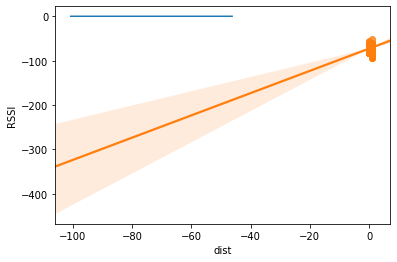

In [12]:
sns.distplot(data.RSSI)
sns.regplot(data.dist, data.RSSI)

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#printing accuracy of testing & training data
y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_test_pred = logreg.predict(X_test)
print("Training Accuracy is ", accuracy_score(y_test, y_test_pred)*100)

y_val_pred=logreg.predict(X_val)

print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)



Training Accuracy is  59.106529209621996
Training Accuracy is  53.84615384615385
Validation Accuracy is  52.054794520547944


/Users/KraftyK/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# kNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# training/fitting a model with training data
knn.fit(X_train, y_train)

y_train_pred=knn.predict(X_train)
predictions_fast = knn.predict(X_val)
y_test_pred=knn.predict(X_test)

print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
print("Testing Accuracy is ", accuracy_score(y_test,y_test_pred)*100)
print("Validation Accuracy is ", accuracy_score(y_val,predictions_fast)*100)

# Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=5)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# training/fitting the model with training data
decision_tree.fit(X_train, y_train)



y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

# Model Evaluation

Confusion Matrix:
[[51 33]
 [20 42]]

Normalized Confusion Matrix:
[[0.60714286 0.39285714]
 [0.32258065 0.67741935]]


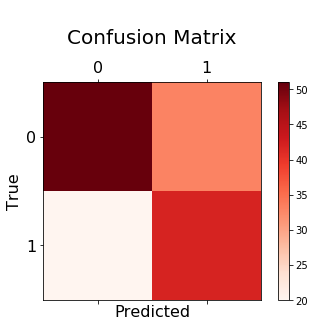

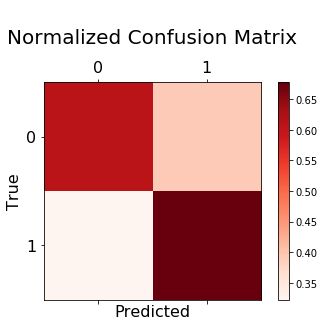

In [10]:
print('Confusion Matrix:')
labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels)
print(cm)

# Normalized confusion matrix
print('\nNormalized Confusion Matrix:')
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

plot_cmatrix(cm,labels)
plot_cmatrix(cm_norm,labels,title='Normalized Confusion Matrix')

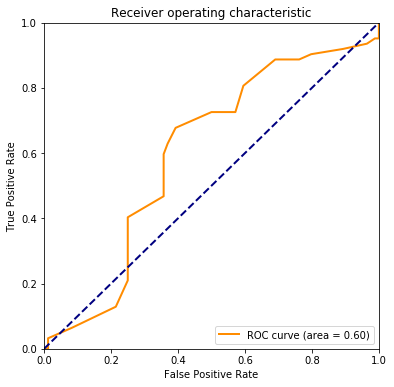

In [11]:
# Predict class label probabilities
y_val_prob = svm3.predict_proba(X_val)

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()